Mounting Google Drive to load the data

In [0]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls

drive  sample_data


In [0]:
file ='/content/drive/My Drive/Big Data Machine Learning/corpbonds_stocks.csv'

## 1)
 Read the csv file and run exploratory analysis

In [0]:
import pandas as pd

df =pd.read_csv(file,parse_dates=True,index_col='Date')


In [0]:
df.tail()

,AAPL-corpbond,HD-corpbond,IBM-corpbond,NKE-corpbond,AAPL-stock,HD-stock,IBM-stock,NKE-stock
Date,,,,,,,,
2019-12-24,119.89,128.71,113.85,132.86,500.844423,346.457990,85.164483,350.103645
2019-12-26,120.11,128.81,113.96,133.22,510.781380,346.693518,85.120318,352.096464
2019-12-27,120.35,129.10,114.08,133.60,510.587519,345.358979,85.347456,355.103147
2019-12-30,120.23,129.13,113.98,133.61,513.617947,341.182686,83.795334,352.411123
2019-12-31,120.21,129.18,114.09,133.41,517.370681,342.862628,84.571390,354.194135


2)
 Plotting and checking the data
 

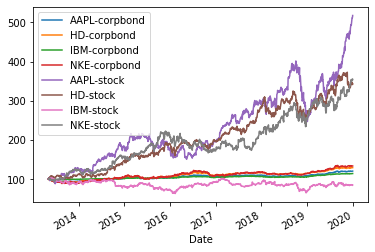

In [0]:
df.plot()

Shape function to check number of rows and columns:
There are 1678 rows and 8 columns

In [0]:
df.shape

(1678, 8)

In [0]:
df.isnull().sum()

AAPL-corpbond    0
HD-corpbond      0
IBM-corpbond     0
NKE-corpbond     0
AAPL-stock       0
HD-stock         0
IBM-stock        0
NKE-stock        0
dtype: int64

There are no null values in the data


In [0]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AAPL-corpbond,1678.0,105.331883,6.569989,91.360000,101.130000,106.675000,109.050000,120.410000
HD-corpbond,1678.0,109.188546,9.504278,89.460000,101.870000,111.880000,115.027500,129.560000
IBM-corpbond,1678.0,104.494142,3.751801,97.860000,101.692500,104.765000,106.197500,114.160000
NKE-corpbond,1678.0,109.723391,10.701541,88.670000,102.125000,111.135000,115.970000,134.510000
AAPL-stock,1678.0,230.509441,91.309121,88.089813,162.368700,203.014119,297.926176,517.370681
HD-stock,1678.0,206.465727,76.021049,99.303447,145.148096,192.895903,273.657868,372.617919
IBM-stock,1678.0,86.192638,7.349587,62.988042,82.299421,86.288200,91.228774,102.851375
NKE-stock,1678.0,196.926293,62.410174,93.497754,155.202186,187.839016,234.076894,355.103147


In [0]:
#Sorting the data based on date in ascending order

df = df.sort_values(by='Date', ascending= True)

4) Calculating the returns for each year


In [0]:
#Retrieve the last row in dataset
lastrow= df.iloc[-1,]
lastrow
#Retrieve the first row in dataset
firstrow = df.iloc[0,]
#Combining the data
rge = pd.concat((lastrow,firstrow),axis=1)
#Calculating the total return for all the assets
rge['Returns'] = round(((lastrow.divide(firstrow)) -1 )*100,2)

#Storing only bond name and the return column

rge1 = rge.iloc[:,2]
rge1

AAPL-corpbond     20.21
HD-corpbond       29.18
IBM-corpbond      14.09
NKE-corpbond      33.41
AAPL-stock       417.37
HD-stock         242.86
IBM-stock        -15.43
NKE-stock        254.19
Name: Returns, dtype: float64

In [0]:
#Creating subsets to retrive data for each year
df_2019 = df.loc['2019-01-01':'2019-12-31',:]
df_2018 = df.loc['2018-01-01':'2018-12-31',:]
df_2017 = df.loc['2017-01-01':'2017-12-31',:]


In [0]:
#Calculating returns for 2019
lastrow= df_2019.iloc[-1,]
firstrow = df_2019.iloc[0,]
rge_2019 = pd.concat((lastrow,firstrow),axis=1)
rge_2019['Returns_2019'] = round(((lastrow.divide(firstrow)) -1 )*100,2)
rge_2019 = rge_2019.iloc[:,2]


In [0]:
#Calculating returns for 2018
lastrow= df_2018.iloc[-1,]
firstrow = df_2018.iloc[0,]
rge_2018 = pd.concat((lastrow,firstrow),axis=1)
rge_2018['Returns_2018'] = round(((lastrow.divide(firstrow)) -1 )*100,2)
rge_2018 = rge_2018.iloc[:,2]


In [0]:
#Calculating returns for 2017
lastrow= df_2017.iloc[-1,]
firstrow = df_2017.iloc[0,]
rge_2017 = pd.concat((lastrow,firstrow),axis=1)
rge_2017['Returns_2017'] = round(((lastrow.divide(firstrow)) -1 )*100,2)
rge_2017 = rge_2017.iloc[:,2]
rge_2017

AAPL-corpbond     4.00
HD-corpbond       5.52
IBM-corpbond      2.26
NKE-corpbond      6.58
AAPL-stock       48.04
HD-stock         44.37
IBM-stock        -4.68
NKE-stock        21.94
Name: Returns_2017, dtype: float64

Combining all the return values and forming a dictionary


In [0]:
frame = pd.concat([rge1,rge_2019,rge_2018,rge_2017],axis=1).T
investment_returns= {}
investment_returns = frame.to_dict('list')
investment_returns

{'AAPL-corpbond': [20.21, 10.35, -0.91, 4.0],
 'AAPL-stock': [417.37, 88.74, -7.05, 48.04],
 'HD-corpbond': [29.18, 12.6, -1.64, 5.52],
 'HD-stock': [242.86, 30.11, -6.56, 44.37],
 'IBM-corpbond': [14.09, 7.63, -0.78, 2.26],
 'IBM-stock': [-15.43, 21.92, -22.97, -4.68],
 'NKE-corpbond': [33.41, 16.21, -3.05, 6.58],
 'NKE-stock': [254.19, 38.24, 18.09, 21.94]}

5) Class to check the bonds that are performing better than NKE-corpbond


In [0]:
#Creating a dictionary containing return values of year 2019
rge_dict = rge_2019.to_dict()

rge_dict


{'AAPL-corpbond': 10.35,
 'AAPL-stock': 88.74,
 'HD-corpbond': 12.6,
 'HD-stock': 30.11,
 'IBM-corpbond': 7.63,
 'IBM-stock': 21.92,
 'NKE-corpbond': 16.21,
 'NKE-stock': 38.24}

In [0]:
class Winner():

  def winner_check(d):
    for bond in d.keys():
      if d[bond] > d['NKE-corpbond']:
        print(bond)

Winners= Winner.winner_check(rge_dict)

AAPL-stock
HD-stock
IBM-stock
NKE-stock


6) Class to check the bonds that are performing worse that NKE-corpbond




In [0]:
class Loser():

  def loser_check(d):
    for bond in d.keys():
      if d[bond] < d['NKE-corpbond']:
        print(bond)

Lossers= Loser.loser_check(rge_dict)

AAPL-corpbond
HD-corpbond
IBM-corpbond


7) Class that takes a certain list of tickers and outputs the index of an "equally-weighted" portfolio 

In [0]:
ticker = ['AAPL-corpbond', 'IBM-stock','Something']

In [0]:
import numpy as np
class Portfolio():

  in_tickers= []

  for i in ticker:
    if i in df.columns:
      in_tickers.append(i)
  print(in_tickers)

  def equal_weight(self):
    ew = df.loc[:,self.in_tickers].apply(lambda elem: np.divide(elem,len(self.in_tickers)))
    print(ew)

  def print_plot(self):
    df.loc[:,self.in_tickers].plot()


    

['AAPL-corpbond', 'IBM-stock']


In [0]:
p = Portfolio()
p.equal_weight()

            AAPL-corpbond  IBM-stock
Date                                
2013-05-03         50.000  50.000000
2013-05-06         49.740  49.577044
2013-05-07         49.700  49.784872
2013-05-08         49.645  50.310506
2013-05-09         49.605  49.922420
...                   ...        ...
2019-12-24         59.945  42.582241
2019-12-26         60.055  42.560159
2019-12-27         60.175  42.673728
2019-12-30         60.115  41.897667
2019-12-31         60.105  42.285695

[1678 rows x 2 columns]


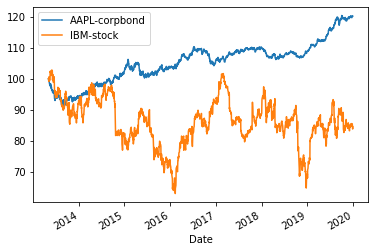

In [0]:
p.print_plot()